In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import scipy.stats as st


In [2]:
#read in raw data.  File from online did not have country index like github jupyter notebook showed
data = pd.read_csv('/Users/kscomputer/Desktop/Project_1/Project_1/output_data/oxford_clean3.csv')
data.head()

,CountryName,Date,C1_School_closing,C2_Workplace_closing,C6_Stay_home_requirements,E1_Income_support,E3_Fiscal_measures,H6_Facial_coverings,ConfirmedCases,ConfirmedDeaths
0,Brazil,20200101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Brazil,20200102,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Brazil,20200103,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Brazil,20200104,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Brazil,20200105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
data['Date'] = pd.to_datetime(data['Date'], format='%Y%m%d')
data.head()
data.set_index('CountryName')

,Date,C1_School_closing,C2_Workplace_closing,C6_Stay_home_requirements,E1_Income_support,E3_Fiscal_measures,H6_Facial_coverings,ConfirmedCases,ConfirmedDeaths
CountryName,,,,,,,,,
Brazil,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Brazil,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Brazil,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Brazil,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Brazil,2020-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
United States,2020-10-21,3.0,2.0,2.0,2.0,0.0,4.0,8273304.0,221066.0
United States,2020-10-22,3.0,2.0,2.0,2.0,0.0,4.0,8336282.0,222201.0
United States,2020-10-23,3.0,2.0,2.0,2.0,0.0,4.0,8408340.0,223042.0


c1:
0 - no measures 
1 - recommend closing 
2 - require closing (only some levels or categories, eg just high school, or just public schools) 
3 - require closing all levels 
Blank - no data
c2:
0 - no measures 
1 - recommend closing (or recommend work from home) 
2 - require closing (or work from home) for some sectors or categories of workers 
3 - require closing (or work from home) for all-but-essential workplaces (eg grocery stores, doctors) 
Blank - no data
c6:
0 - no measures 
1 - recommend not leaving house 
2 - require not leaving house with exceptions for daily exercise, grocery shopping, and 'essential' trips 
3 - require not leaving house with minimal exceptions (eg allowed to leave once a week, or only one person can leave at a time, etc) 
Blank - no data
h6:
0 - No policy 
1 - Recommended 
2 - Required in some specified shared/public spaces outside the home with other people present, or some situations when social distancing not possible 
3 - Required in all shared/public spaces outside the home with other people present or all situations when social distancing not possible 
4 - Required outside the home at all times regardless of location or presence of other people

In [4]:
#last day everyone reported.  All 11 countries. 
last_report = data.loc[data['Date']=='2020-10-22']
last_report

,CountryName,Date,C1_School_closing,C2_Workplace_closing,C6_Stay_home_requirements,E1_Income_support,E3_Fiscal_measures,H6_Facial_coverings,ConfirmedCases,ConfirmedDeaths
295,Brazil,2020-10-22,3.0,2.0,2.0,1.0,0.000000e+00,4.0,5298772.0,155403.0
597,China,2020-10-22,1.0,2.0,3.0,1.0,0.000000e+00,2.0,91044.0,4739.0
899,United Kingdom,2020-10-22,3.0,2.0,1.0,2.0,5.305826e+09,3.0,789229.0,44158.0
1206,Italy,2020-10-22,1.0,2.0,0.0,1.0,0.000000e+00,3.0,449648.0,36832.0
1502,Japan,2020-10-22,1.0,1.0,1.0,1.0,0.000000e+00,1.0,94524.0,1685.0
1800,New Zealand,2020-10-22,0.0,0.0,0.0,2.0,0.000000e+00,1.0,1558.0,25.0
2106,Sweden,2020-10-22,0.0,1.0,0.0,2.0,0.000000e+00,0.0,109326.0,5917.0
2406,United States,2020-10-22,3.0,2.0,2.0,2.0,0.000000e+00,4.0,8336282.0,222201.0


In [5]:
last_report.describe()

,C1_School_closing,C2_Workplace_closing,C6_Stay_home_requirements,E1_Income_support,E3_Fiscal_measures,H6_Facial_coverings,ConfirmedCases,ConfirmedDeaths
count,8.000000,8.000000,8.000000,8.000000,8.000000e+00,8.000000,8.000000e+00,8.000000
mean,1.500000,1.500000,1.125000,1.500000,6.632283e+08,2.250000,1.896298e+06,58870.000000
std,1.309307,0.755929,1.125992,0.534522,1.875893e+09,1.488048,3.154526e+06,83806.576334
min,0.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000,1.558000e+03,25.000000
25%,0.750000,1.000000,0.000000,1.000000,0.000000e+00,1.000000,9.365400e+04,3975.500000
50%,1.000000,2.000000,1.000000,1.500000,0.000000e+00,2.500000,2.794870e+05,21374.500000
75%,3.000000,2.000000,2.000000,2.000000,0.000000e+00,3.250000,1.916615e+06,71969.250000
max,3.000000,2.000000,3.000000,2.000000,5.305826e+09,4.000000,8.336282e+06,222201.000000


In [6]:
df = data[['CountryName','Date','E1_Income_support','E3_Fiscal_measures','ConfirmedCases','ConfirmedDeaths']]
df.head()

,CountryName,Date,E1_Income_support,E3_Fiscal_measures,ConfirmedCases,ConfirmedDeaths
0,Brazil,2020-01-01,0.0,0.0,0.0,0.0
1,Brazil,2020-01-02,0.0,0.0,0.0,0.0
2,Brazil,2020-01-03,0.0,0.0,0.0,0.0
3,Brazil,2020-01-04,0.0,0.0,0.0,0.0
4,Brazil,2020-01-05,0.0,0.0,0.0,0.0


In [7]:
# df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d')
# df.head()
df.set_index('CountryName')

,Date,E1_Income_support,E3_Fiscal_measures,ConfirmedCases,ConfirmedDeaths
CountryName,,,,,
Brazil,2020-01-01,0.0,0.0,0.0,0.0
Brazil,2020-01-02,0.0,0.0,0.0,0.0
Brazil,2020-01-03,0.0,0.0,0.0,0.0
Brazil,2020-01-04,0.0,0.0,0.0,0.0
Brazil,2020-01-05,0.0,0.0,0.0,0.0
...,...,...,...,...,...
United States,2020-10-21,2.0,0.0,8273304.0,221066.0
United States,2020-10-22,2.0,0.0,8336282.0,222201.0
United States,2020-10-23,2.0,0.0,8408340.0,223042.0


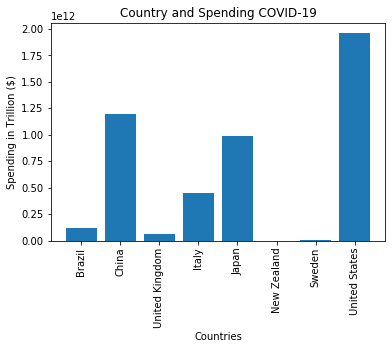

In [8]:
plt.bar(df['CountryName'],df['E3_Fiscal_measures'])
plt.xticks(rotation='vertical')
plt.title('Country and Spending COVID-19')
plt.xlabel('Countries')
plt.ylabel('Spending in Trillions ($)')
plt.show()

(array([737425., 737456., 737485., 737516., 737546., 737577., 737607.,
        737638., 737669., 737699., 737730.]),
 <a list of 11 Text xticklabel objects>)

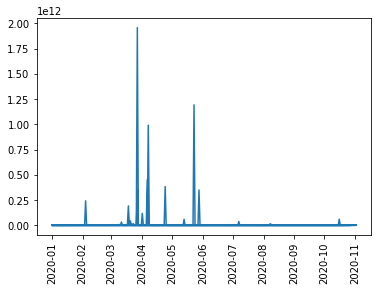

In [9]:
#graph of all countries over time and spending
plt.plot(df['Date'],df['E3_Fiscal_measures'])
plt.xticks(rotation='vertical')

In [10]:
#for country in df['CountryName']:
    #fig, ax = plt.subplots()
    #c=df.loc[df['CountryName']==country]
    #ax.plot(c['Date'],c['E3_Fiscal measures'],label=country)
    
#plt.xticks(rotation='vertical')
#plt.xlabel('Date')
#plt.ylabel('Spending in trillion ($)')
#plt.legend()
#plt.show()

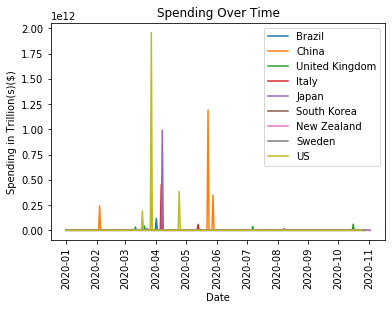

In [11]:
#figure looking at all 8 countries and amount of money spent during COVID
fig, ax = plt.subplots()

brazil = df.loc[df['CountryName']=='Brazil']
ax.plot(brazil['Date'],brazil['E3_Fiscal_measures'], label = 'Brazil')

china=df.loc[df['CountryName']=='China']
ax.plot(china['Date'],china['E3_Fiscal_measures'],label='China')

uk = df.loc[df['CountryName']=='United Kingdom']
ax.plot(uk['Date'],uk['E3_Fiscal_measures'],label='United Kingdom')

italy = df.loc[df['CountryName']=='Italy']
ax.plot(italy['Date'],italy['E3_Fiscal_measures'],label='Italy')

japan=df.loc[df['CountryName']=='Japan']
ax.plot(japan['Date'],japan['E3_Fiscal_measures'],label='Japan')

sk=df.loc[df['CountryName']=='South Korea']
ax.plot(sk['Date'],sk['E3_Fiscal_measures'],label='South Korea')

nz= df.loc[df['CountryName']=='New Zealand']
ax.plot(nz['Date'],nz['E3_Fiscal_measures'],label='New Zealand')

meatball= df.loc[df['CountryName']=='Sweden']
ax.plot(meatball['Date'],meatball['E3_Fiscal_measures'],label='Sweden')

us = df.loc[df['CountryName']=='United States']
ax.plot(us['Date'],us['E3_Fiscal_measures'],label='US')

plt.xticks(rotation='vertical')
plt.title('Spending Over Time')
plt.xlabel('Date')
plt.ylabel('Spending in Trillion(s)($)')
plt.legend()
plt.show()

In [35]:
us_spend = us['E3_Fiscal_measures'].sum()
china_spend = china['E3_Fiscal_measures'].sum()
uk_sum = uk['E3_Fiscal_measures'].sum()
italy_sum = italy['E3_Fiscal_measures'].sum()
sweden_sum = meatball['E3_Fiscal_measures'].sum()
japan_sum = japan['E3_Fiscal_measures'].sum()
nz_sum = nz['E3_Fiscal_measures'].sum()
brazil_sum = brazil['E3_Fiscal_measures'].sum()

total = {'United States':[us_spend],'China':[china_spend],'Japan':[japan_sum],'Italy':[italy_sum],'Brazil':[brazil_sum],
         'United Kingdom':[uk_sum],'Sweden':[sweden_sum],'New Zealand':[nz_sum]}


sum_df = pd.DataFrame(index=['Spent'],data = total)
sum_df.style.format('${:,.2f}')

,United States,China,Japan,Italy,Brazil,United Kingdom,Sweden,New Zealand
Spent,"$2,535,200,000,000.00","$2,136,809,000,000.00","$1,005,521,520,851.00","$542,022,172,143.20","$185,820,699,472.27","$181,278,349,255.19","$8,162,169,045.70",$0.00


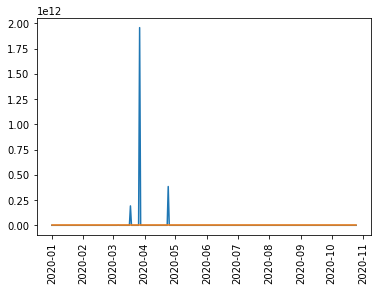

In [13]:
#US spending and cases.  Cannot tell anything because US spending is 2Trillion and cases is over 8million
plt.plot(us['Date'],us['E3_Fiscal_measures'])
plt.plot(us['Date'],us['ConfirmedCases'])
plt.xticks(rotation='vertical')
plt.show()

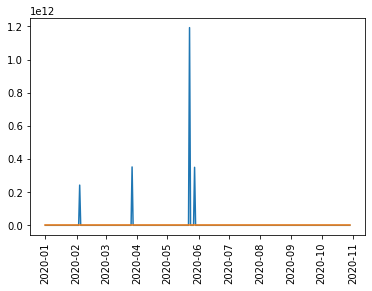

In [14]:
#China spending and cases.  Cannot tell anything because China spending is over 1Trillion and cases is over 91k
plt.plot(china['Date'],china['E3_Fiscal_measures'])
plt.plot(china['Date'],china['ConfirmedCases'])
plt.xticks(rotation='vertical')
plt.show()

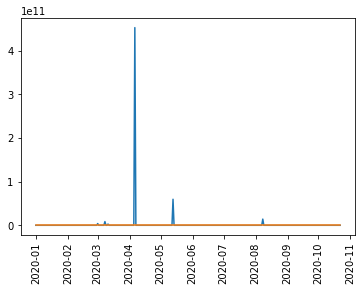

In [15]:
#italy spending and cases.  Cannot tell anything because italy spending is 4billion and cases is over 500k
plt.plot(italy['Date'],italy['E3_Fiscal_measures'])
plt.plot(italy['Date'],italy['ConfirmedCases'])
plt.xticks(rotation='vertical')
plt.show()

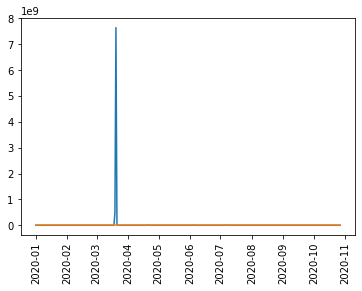

In [16]:
#Sweden spending and cases.  Cannot tell anything because sweden spending is 7billion and cases is over 109k
plt.plot(meatball['Date'],meatball['E3_Fiscal_measures'])
plt.plot(meatball['Date'],meatball['ConfirmedCases'])
plt.xticks(rotation='vertical')
plt.show()

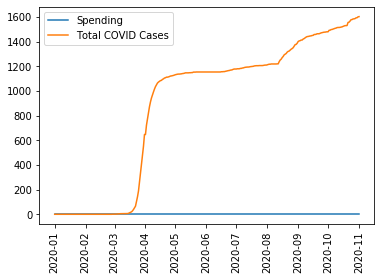

In [17]:
#newzealand spending and cases.  NewZealand spending is 0 and cases is over 1.6k.  The country is just beginning to talk about economic impact now that COVID is none existent in the country
plt.plot(nz['Date'],nz['E3_Fiscal_measures'], label='Spending')
plt.plot(nz['Date'],nz['ConfirmedCases'], label='Total COVID Cases')
plt.xticks(rotation='vertical')
plt.legend()
plt.show()

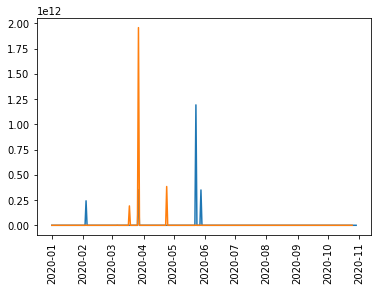

In [19]:
#China v US economic spending
plt.plot(china['Date'],china['E3_Fiscal_measures'])
plt.plot(us['Date'],us['E3_Fiscal_measures'])
plt.xticks(rotation='vertical')
plt.show()

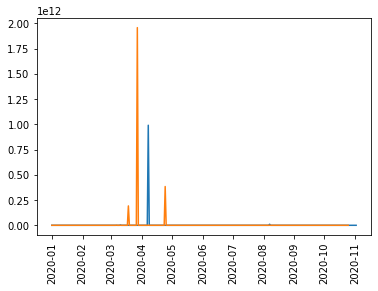

In [21]:
#japan v us economic spending
plt.plot(japan['Date'],japan['E3_Fiscal_measures'])
plt.plot(us['Date'],us['E3_Fiscal_measures'])
plt.xticks(rotation='vertical')
plt.show()

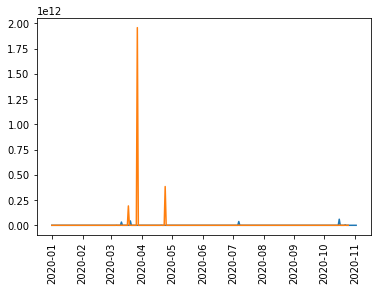

In [24]:
#uk v us economic spending
plt.plot(uk['Date'],uk['E3_Fiscal_measures'])
plt.plot(us['Date'],us['E3_Fiscal_measures'])
plt.xticks(rotation='vertical')
plt.show()

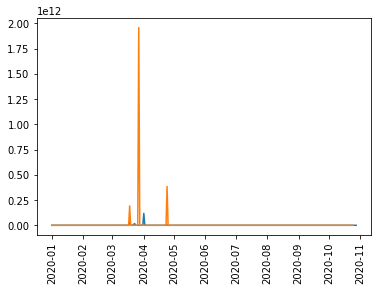

In [26]:
#brazil v us economic spending
plt.plot(brazil['Date'],brazil['E3_Fiscal_measures'])
plt.plot(us['Date'],us['E3_Fiscal_measures'])
plt.xticks(rotation='vertical')
plt.show()